In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option("display.max_rows",250)
pd.set_option("display.max_columns",250)
#Classifiers
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF

In [2]:
dataset = pd.read_csv("sc2_dataset_5mins.csv")



In [3]:
liste = dataset.columns.values.tolist()
listeNan = []
for feature in liste:
    listeNan.append(dataset[feature].isnull().sum().sum())
listeNonNan = [34579-x for x in listeNan]
listeElementAeffacer=[]

for i in range(len(liste)):
    if (listeNonNan[i]<0.50*34579):
        listeElementAeffacer.append(liste[i])

# Filtre 32/240 colonnes qui ont plus de 50 % (en realite, + de 80 %) de valeurs non nulles 
dataset = dataset.drop(listeElementAeffacer, axis=1)
#len(dataset.columns.values)
#dataset.columns.values
datasetP1 = dataset[dataset.columns[2:16]]
datasetP2 = dataset[dataset.columns[17:32]]
datasetP2

,p2_APM,p2_APM_wo_select,p2_assigned_hotkeys,p2_building_types,p2_collected_gas,p2_collected_minerals,p2_max_distance_from_opponent,p2_mean_distance_from_opponent,p2_min_distance_from_opponent,p2_nb_scooting,p2_selected_hotkeys,p2_spent_gas,p2_spent_minerals,p2_timing_1st_scooting,p2_unit_types
0,264.644383,118.819927,12,5,878.511088,2892.928802,76.863292,43.617615,1.423767,71,321,100,3600,45.788680,4
1,354.285617,171.997851,15,8,676.418350,2943.334696,149.244511,103.275690,2.195000,21,398,325,4550,117.381424,3
2,308.051662,58.976878,2,5,818.457994,1554.460274,132.819855,105.202475,81.472475,0,1,400,3300,NaN,2
3,131.422040,55.969296,6,4,0.000000,4123.166876,148.651391,130.603130,109.445248,0,58,0,5150,NaN,2
4,115.819424,23.432118,3,7,721.810045,1829.478815,181.614012,168.839979,144.125951,0,1,0,3525,NaN,2
5,210.635325,89.257895,5,8,496.845523,3106.926597,125.957686,98.946793,5.981135,18,41,225,4600,94.284080,4
6,311.452233,91.484126,9,8,553.262590,2810.883608,122.910950,88.800031,16.499111,1,770,200,4125,177.876616,4
7,252.231946,35.672670,3,5,903.376822,2012.189182,131.822025,112.979378,6.598395,10,6,500,3075,108.088352,4
8,177.429967,48.426583,4,6,1559.034630,2169.418035,97.985250,67.824784,4.349768,94,26,475,4225,50.390104,4
9,254.242638,126.573493,5,6,243.144658,5068.211398,149.644703,128.888516,4.069629,4,52,0,5675,58.871160,3


In [4]:
#remplacer les cases vides par la valeur mediane de la caractéristique
non_sparse_dataset = dataset.fillna(dataset.median(axis=0))

Visulizing some data:
step 1 : Ressources

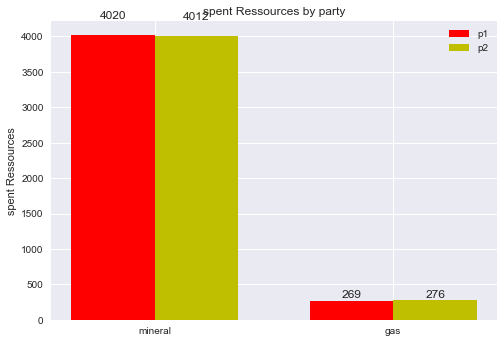

In [5]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 2
men_means = (non_sparse_dataset.p1_spent_minerals.sum()/34578, non_sparse_dataset.p1_spent_gas.sum()/34578)

ind = np.arange(N)  # the x locations for the groups

width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r')

women_means = (non_sparse_dataset.p2_spent_minerals.sum()/34578, non_sparse_dataset.p2_spent_gas.sum()/34578)
rects2 = ax.bar(ind + width, women_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('spent Ressources')
ax.set_title('spent Ressources by party')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('mineral', 'gas'))

ax.legend((rects1[0], rects2[0]), ('p1', 'p2'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

# Extract the target variable
La cible à prédire est le vainqueur du match indiqué dans la variable _p1_win_game.

In [6]:
# tableau des victoires/defaites du joueur p1
# y = resultats
y = non_sparse_dataset._p1_win_game.as_matrix()
y

array([0, 1, 1, ..., 1, 0, 1])

In [7]:
# X = les données 
# les donnees sont encapsulees dans un objet pandas.
# iloc[colonnes, lignes]
# puis convert DataFrame to numpy array
X = non_sparse_dataset.iloc[:,1:].as_matrix()


In [8]:
# Les caracteristiques : on retire les colonnes p1_win_game et game_length
#.columns pour garder uniquement les titres des colonnes
features = non_sparse_dataset.iloc[:,2:].columns
features

Index([u'p1_APM', u'p1_APM_wo_select', u'p1_assigned_hotkeys',
       u'p1_building_types', u'p1_collected_gas', u'p1_collected_minerals',
       u'p1_max_distance_from_opponent', u'p1_mean_distance_from_opponent',
       u'p1_min_distance_from_opponent', u'p1_nb_scooting',
       u'p1_selected_hotkeys', u'p1_spent_gas', u'p1_spent_minerals',
       u'p1_timing_1st_scooting', u'p1_unit_types', u'p2_APM',
       u'p2_APM_wo_select', u'p2_assigned_hotkeys', u'p2_building_types',
       u'p2_collected_gas', u'p2_collected_minerals',
       u'p2_max_distance_from_opponent', u'p2_mean_distance_from_opponent',
       u'p2_min_distance_from_opponent', u'p2_nb_scooting',
       u'p2_selected_hotkeys', u'p2_spent_gas', u'p2_spent_minerals',
       u'p2_timing_1st_scooting', u'p2_unit_types'],
      dtype='object')

# Split the train and test dataset

# sklearn : module de machine learning pour python 
# train_test_split : pour découper le jeu de données en train/test
from sklearn.cross_validation import train_test_split
# 30% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.sort()
X_train

/Users/Florian/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([[  8.69253175e-01,   1.00000000e+00,   3.49974317e+00, ...,
          3.21313378e+03,   3.67500000e+03,   4.25000000e+03],
       [  2.39767137e+00,   2.42988917e+00,   3.00000000e+00, ...,
          4.41393176e+03,   4.72500000e+03,   5.17500000e+03],
       [  2.79566937e+00,   3.00000000e+00,   3.00000000e+00, ...,
          3.71194393e+03,   5.00000000e+03,   5.35000000e+03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   3.00000000e+00, ...,
          8.39687701e+02,   2.52500000e+03,   2.80000000e+03],
       [  1.00000000e+00,   2.10000000e+00,   2.69857005e+00, ...,
          2.18012086e+03,   3.17500000e+03,   3.95000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.20395574e+03,   3.55000000e+03,   4.30000000e+03]])

# Standardizing

In [10]:
from sklearn.preprocessing import StandardScaler
# Certains algo sont moins performants si le jeu de données n'est pas centré sur zero,
# avec une distribution de type gaussienne, ou avec des bornes [0:1] 
stdsc = StandardScaler()
# calcule la moyenne des données puis lui applique un facteur d'échelle
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Cross-validation protocol

In [11]:
#KFold : pour diviser les données 
from sklearn.cross_validation import KFold

#** arguments sous la forme de dico
#X : les donnees
#y : les resultats
#clf_class : un type de classifier : par exemple l'estimateur SVC

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    #KFold : len(y)?
    # nombre de portions:3, et regroupement des données identiques avant decoupage
    kf = KFold(len(y),n_folds=3,shuffle=True)
    # copie la DataFrame des resultats
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # un classifier est un exemple d'estimator, un objet python qui implemente les 
        # methodes .fit(X,y) et predict(T) 
        # Initialize a classifier with keyword arguments
        clf = clf_class(**kwargs)
        # le classifier apprend du modele grace au jeu d'entrainement
        clf.fit(X_train,y_train)
        # puis predit de nouvelles valeurs via le jeu de test
        y_pred[test_index] = clf.predict(X_test)
    return y_pred
# la fonction renvoie les resultats prédits pour le jeu de test (prochaine etape : evaluer l'erreur de la prediction)

In [12]:
# Import de toute une serie d'estimateurs ?
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score

# une methode pour evaluer la precision des modeles
def accuracy(y_true,y_pred):
    # NumPy interpretes True and False as 1. and 0.
    return np.mean(y_true == y_pred)



# Preparing a sample experiment

In [13]:
# on prend 1/10 du jeu d'entrainement, arrondi à l'unite
small_train_index = round(len(X_train)/10)
small_train_index

2420.0

In [14]:
# Les nouveaux X et y pour ce jeu restreint 
# les algorithmes de sklearn prennent des np.array en entrée
y = y_train[:int(small_train_index)]
X = X_train_std[:int(small_train_index),:]
print("X length = %d and y length = %d" % (len(X), len(y)))

X length = 2420 and y length = 2420


In [15]:
# Test des differents modeles
# Plus grande precision : Logistic Regression LR
print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X,y,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Logistic Regression:
0.496
Gradient Boosting Classifier
0.476
Support vector machines:
0.464
Random forest:
0.498
K-nearest-neighbors:
0.499


# Feature selection

In [47]:
from sklearn import svm

# Plusieurs facon d'evaluer la qualite d'un modele 
# l'une est d'utiliser des outils de cross-validation tels que les fonctions de score 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
f =[]
s =[]
# Le noyau : linear, RBF, polynomial ... depend si les points de données sont séparables linéairement
# Ici, a priori oui ...
# Je ne vois pas trop pourquoi il utilise le modele SVC plutot que le modele LR (meilleure note)
# A tester ...
svc = svm.SVC(kernel='linear')
svc.C = 0.01

for features_nb in range(X.shape[1],1, -1):
    f.append(features_nb)
    X_new = SelectKBest(k=features_nb).fit_transform(X, y)
    # Evaluation de la qualite du modele
    this_scores = cross_val_score(svc, X_new, y, n_jobs=8)
    s.append(np.mean(this_scores))

In [48]:
print("The best number of features = %d" % f[s.index(max(s))])

The best number of features = 12


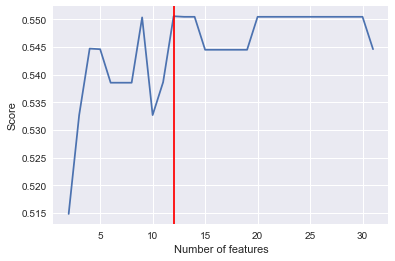

In [49]:
#inverted list of number of features
plt.plot(f,s)
plt.xlabel("Number of features")
plt.ylabel("Score")
# Ajoute une ligne verticale au max
plt.axvline(f[s.index(max(s))],color='r')
plt.show()

In [50]:
# Filtre les caracteristiques les plus importantes (182/240, pourquoi ?)
# j'utilise le jeu de données normal (plus le tout petit)
sk = SelectKBest(k='all')
X_new_train = sk.fit_transform(X_train, y_train)
X_new_test = sk.transform(X_test)

In [51]:
# cree un masque avec les carateristiques qui ont passé le test 
ix = sk.get_support(indices=True)
ix

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [52]:
list(features[ix-1])

['p2_unit_types',
 'p1_APM',
 'p1_APM_wo_select',
 'p1_assigned_hotkeys',
 'p1_building_types',
 'p1_collected_gas',
 'p1_collected_minerals',
 'p1_max_distance_from_opponent',
 'p1_mean_distance_from_opponent',
 'p1_min_distance_from_opponent',
 'p1_nb_scooting',
 'p1_selected_hotkeys',
 'p1_spent_gas',
 'p1_spent_minerals',
 'p1_timing_1st_scooting',
 'p1_unit_types',
 'p2_APM',
 'p2_APM_wo_select',
 'p2_assigned_hotkeys',
 'p2_building_types',
 'p2_collected_gas',
 'p2_collected_minerals',
 'p2_max_distance_from_opponent',
 'p2_mean_distance_from_opponent',
 'p2_min_distance_from_opponent',
 'p2_nb_scooting',
 'p2_selected_hotkeys',
 'p2_spent_gas',
 'p2_spent_minerals',
 'p2_timing_1st_scooting',
 'p2_unit_types']

# Feature importance

Feature ranking:
1. p1_APM (0.040852)
2. p1_APM_wo_select (0.040466)
3. p1_assigned_hotkeys (0.039125)
4. p1_building_types (0.036898)
5. p1_collected_gas (0.034193)
6. p1_collected_minerals (0.032857)
7. p1_max_distance_from_opponent (0.032672)
8. p1_mean_distance_from_opponent (0.032183)
9. p1_min_distance_from_opponent (0.030489)
10. p1_nb_scooting (0.027976)


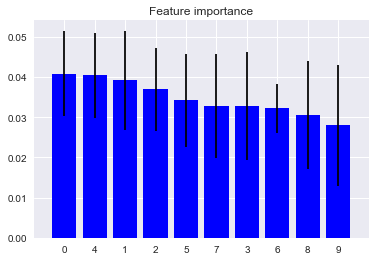

In [53]:
#RF : RandomForestClassifier
forest = RF()
forest_fit = forest.fit(X_new_train, y_train)
forest_prediction = forest_fit.predict(X_new_test)

# renvoie un array avec les importances relatives des 10 premieres caracteristiques
importances = forest_fit.feature_importances_[:10]

# numpy.std : Returns the standard deviation, a measure of the spread of a distribution
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# Renvoie un tableau des indices dans l'ordre où ils seraient après un tri
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))
    
#plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(range(10), importances[indices], yerr=std[indices], color="b", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1,10])
plt.show()

### APM = actions per minute


# Optimizing

In [54]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-3, -1, 10)
# retourne 50 nombres entre 10**-3 et 10**-1

scores = list()
scores_std = list()

# ces nombres sont utilisés comme parametre C de svc

# Globalement : le modele SVM est très dépendant du choix de ses deux paramètres, C et \gamma
#  TODO   une optimisation globale peut être réalisée grace à la méthode sklearn.model_selection.GridSearchCV
#
# Mega long, besoin de limiter au jeu de données restreint ?
for C in C_s:
    svc.C = C
    # fonctions de score enfonction de C
    # Standardisation 
    this_scores = cross_val_score(svc, X_new_train, y_train, n_jobs=4)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    


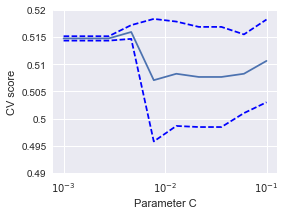

In [55]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')

# Choix graphique d'un parametre svc.C
plt.show()

In [56]:
max(scores)

0.51593966400970726

## Feature engeneering

In [57]:
non_sparse_dataset.iloc[:,2:].head()

,p1_APM,p1_APM_wo_select,p1_assigned_hotkeys,p1_building_types,p1_collected_gas,p1_collected_minerals,p1_max_distance_from_opponent,p1_mean_distance_from_opponent,p1_min_distance_from_opponent,p1_nb_scooting,p1_selected_hotkeys,p1_spent_gas,p1_spent_minerals,p1_timing_1st_scooting,p1_unit_types,p2_APM,p2_APM_wo_select,p2_assigned_hotkeys,p2_building_types,p2_collected_gas,p2_collected_minerals,p2_max_distance_from_opponent,p2_mean_distance_from_opponent,p2_min_distance_from_opponent,p2_nb_scooting,p2_selected_hotkeys,p2_spent_gas,p2_spent_minerals,p2_timing_1st_scooting,p2_unit_types
0,198.472044,99.135885,5,5,737.996230,2309.493051,87.352990,47.054275,4.082069,79,121,250,4050,4.150304,5,264.644383,118.819927,12,5,878.511088,2892.928802,76.863292,43.617615,1.423767,71,321,100,3600,45.788680,4
1,352.059043,137.623080,12,5,295.221950,4996.605120,147.601756,103.622467,5.770096,14,245,0,5525,68.886024,4,354.285617,171.997851,15,8,676.418350,2943.334696,149.244511,103.275690,2.195000,21,398,325,4550,117.381424,3
2,81.627419,42.929976,1,7,882.029824,2276.622192,134.754321,113.196754,3.303471,7,1,250,2600,161.771632,3,308.051662,58.976878,2,5,818.457994,1554.460274,132.819855,105.202475,81.472475,0,1,400,3300,100.464424,2
3,269.726354,108.597845,9,5,940.675424,3106.897274,146.460952,112.204376,6.834298,16,0,725,4275,117.110752,4,131.422040,55.969296,6,4,0.000000,4123.166876,148.651391,130.603130,109.445248,0,58,0,5150,100.464424,2
4,94.486888,47.443628,4,5,88.789438,3200.143778,181.691168,83.543895,2.836126,97,24,0,3150,160.237824,4,115.819424,23.432118,3,7,721.810045,1829.478815,181.614012,168.839979,144.125951,0,1,0,3525,100.464424,2


In [58]:
# dataset est un pd.dataFrame
df = non_sparse_dataset.iloc[:,2:]
df.head()

,p1_APM,p1_APM_wo_select,p1_assigned_hotkeys,p1_building_types,p1_collected_gas,p1_collected_minerals,p1_max_distance_from_opponent,p1_mean_distance_from_opponent,p1_min_distance_from_opponent,p1_nb_scooting,p1_selected_hotkeys,p1_spent_gas,p1_spent_minerals,p1_timing_1st_scooting,p1_unit_types,p2_APM,p2_APM_wo_select,p2_assigned_hotkeys,p2_building_types,p2_collected_gas,p2_collected_minerals,p2_max_distance_from_opponent,p2_mean_distance_from_opponent,p2_min_distance_from_opponent,p2_nb_scooting,p2_selected_hotkeys,p2_spent_gas,p2_spent_minerals,p2_timing_1st_scooting,p2_unit_types
0,198.472044,99.135885,5,5,737.996230,2309.493051,87.352990,47.054275,4.082069,79,121,250,4050,4.150304,5,264.644383,118.819927,12,5,878.511088,2892.928802,76.863292,43.617615,1.423767,71,321,100,3600,45.788680,4
1,352.059043,137.623080,12,5,295.221950,4996.605120,147.601756,103.622467,5.770096,14,245,0,5525,68.886024,4,354.285617,171.997851,15,8,676.418350,2943.334696,149.244511,103.275690,2.195000,21,398,325,4550,117.381424,3
2,81.627419,42.929976,1,7,882.029824,2276.622192,134.754321,113.196754,3.303471,7,1,250,2600,161.771632,3,308.051662,58.976878,2,5,818.457994,1554.460274,132.819855,105.202475,81.472475,0,1,400,3300,100.464424,2
3,269.726354,108.597845,9,5,940.675424,3106.897274,146.460952,112.204376,6.834298,16,0,725,4275,117.110752,4,131.422040,55.969296,6,4,0.000000,4123.166876,148.651391,130.603130,109.445248,0,58,0,5150,100.464424,2
4,94.486888,47.443628,4,5,88.789438,3200.143778,181.691168,83.543895,2.836126,97,24,0,3150,160.237824,4,115.819424,23.432118,3,7,721.810045,1829.478815,181.614012,168.839979,144.125951,0,1,0,3525,100.464424,2


In [59]:
# Cette partie pour ne conserver que les colonnes communes à p1 et p2

colnames = df.columns.values
# colnames est un numpy.ndarray
# de 238 colonnes
colnames
# creer une sous_liste avec les colonnes contenant p1
p1_colnames = [name for name in colnames if "p1" in name]
p1_colnames = [name[2:]+'$' for name in p1_colnames ]
p2_colnames = [name for name in colnames if "p2" in name]
p2_colnames = [name[2:]+'$' for name in p2_colnames ]
print str(len(p1_colnames)) + " " + str(len(p2_colnames))
colnames = [name for name in p1_colnames if name in p2_colnames ]
len(colnames)
colnames

15 15


['_APM$',
 '_APM_wo_select$',
 '_assigned_hotkeys$',
 '_building_types$',
 '_collected_gas$',
 '_collected_minerals$',
 '_max_distance_from_opponent$',
 '_mean_distance_from_opponent$',
 '_min_distance_from_opponent$',
 '_nb_scooting$',
 '_selected_hotkeys$',
 '_spent_gas$',
 '_spent_minerals$',
 '_timing_1st_scooting$',
 '_unit_types$']

In [60]:
colnames.sort()
colnames
# A présent, c'est une liste triée

['_APM$',
 '_APM_wo_select$',
 '_assigned_hotkeys$',
 '_building_types$',
 '_collected_gas$',
 '_collected_minerals$',
 '_max_distance_from_opponent$',
 '_mean_distance_from_opponent$',
 '_min_distance_from_opponent$',
 '_nb_scooting$',
 '_selected_hotkeys$',
 '_spent_gas$',
 '_spent_minerals$',
 '_timing_1st_scooting$',
 '_unit_types$']

In [61]:
# nouvelle DataFrame : p1-p2 pour chaque colonne
select_df = pd.DataFrame()
for name in colnames:
    # Fait : retirer les colonnes qui n'existent que pour p1 et pas pour p2
    
    # filtre par une regular expression
    # A priori, le $ doit eviter d'inclure les colonnes pi_APM_wo_select 
    filt_df = df.filter(regex=name)
    # Pour toutes les lignes sauf la première, select_df fait la difference entre les donnees p1 et p2
    select_df[name[:-1]] = filt_df.iloc[:,0]-filt_df.iloc[:,1]
    # matrice a partir de toutes les lignes et de la premiere colonne
    # idem seconde colonne
select_df


,_APM,_APM_wo_select,_assigned_hotkeys,_building_types,_collected_gas,_collected_minerals,_max_distance_from_opponent,_mean_distance_from_opponent,_min_distance_from_opponent,_nb_scooting,_selected_hotkeys,_spent_gas,_spent_minerals,_timing_1st_scooting,_unit_types
0,-66.172338,-19.684042,-7,0,-140.514858,-583.435752,10.489698,3.436660,2.658302,8,-200,150,450,-41.638376,1
1,-2.226574,-34.374770,-3,-3,-381.196400,2053.270424,-1.642755,0.346777,3.575096,-7,-153,-325,975,-48.495400,1
2,-226.424244,-16.046903,-1,2,63.571830,722.161918,1.934465,7.994279,-78.169004,7,0,-150,-700,61.307208,1
3,138.304314,52.628549,3,1,940.675424,-1016.269602,-2.190440,-18.398754,-102.610951,16,-58,725,-875,16.646328,2
4,-21.332536,24.011510,1,-2,-633.020606,1370.664963,0.077156,-85.296084,-141.289825,97,23,0,-375,59.773400,2
5,-20.746371,-10.478836,7,-2,-0.938330,-93.070567,-7.698371,-9.734415,14.850836,-18,20,-175,-425,139.576528,0
6,-5.600939,39.777364,1,-3,-72.251379,539.832748,9.017760,19.908427,-1.550609,4,-552,-150,-1075,-68.525128,0
7,-133.812086,14.335717,-1,0,-61.226006,1015.360596,-8.139507,1.088559,21.853427,-8,3,125,625,45.924016,2
8,57.209202,52.648751,3,1,-935.045446,1180.242700,-2.638155,5.405508,10.349471,-82,3,50,-50,153.786808,0
9,9.599984,-19.530191,0,2,508.105478,-1438.987087,0.497921,-14.354168,-2.364031,41,73,250,-1650,0.360896,0


In [62]:
# donnees reorganisées sous forme de matrice
# centrée et normalisée
stdsc = StandardScaler()
scaled_mat = stdsc.fit_transform(select_df)
scaled_mat

array([[-0.72446933, -0.50371648, -1.06983042, ...,  0.41217096,
        -0.52709997,  0.70812363],
       [-0.01999674, -0.89178368, -0.46362284, ...,  0.90138823,
        -0.61228793,  0.70812363],
       [-2.48991974, -0.40763857, -0.16051905, ..., -0.65944781,
         0.75184027,  0.70812363],
       ..., 
       [ 1.39857157,  1.10389205,  1.05189611, ..., -0.03045418,
        -0.43686799,  0.70812363],
       [-2.43843038, -0.39512985, -0.31207094, ...,  0.08602612,
        -2.31940974,  0.70812363],
       [ 0.87557883,  1.2138314 , -0.61517473, ...,  0.36557884,
        -1.14807534, -0.01163554]])

In [63]:
# objet DataFrame à partir de cette matrice
scaled_df = pd.DataFrame(scaled_mat, columns=select_df.columns.values)

In [64]:
# fonction de stat pour dataFrame
scaled_df.describe()

,_APM,_APM_wo_select,_assigned_hotkeys,_building_types,_collected_gas,_collected_minerals,_max_distance_from_opponent,_mean_distance_from_opponent,_min_distance_from_opponent,_nb_scooting,_selected_hotkeys,_spent_gas,_spent_minerals,_timing_1st_scooting,_unit_types
count,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04,3.457900e+04
mean,9.888912e-18,-1.483337e-18,-2.955950e-16,8.157197e-16,7.641432e-19,1.414307e-17,-1.490400e-17,1.190001e-17,-3.818950e-17,1.035286e-17,1.804004e-18,-9.496566e-17,-2.485873e-17,-2.908881e-18,-4.321464e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-6.350831e+00,-1.365516e+01,-1.183001e+01,-3.720524e+00,-6.934543e+00,-1.307403e+01,-7.799049e+00,-5.526028e+00,-5.662216e+00,-1.181767e+01,-8.818785e+00,-7.659035e+00,-1.295977e+01,-3.635900e+00,-3.610431e+00
25%,-6.366437e-01,-6.223842e-01,-6.151747e-01,-4.569724e-01,-5.856429e-01,-5.967591e-01,-2.996785e-01,-5.713459e-01,-1.999375e-01,-4.754745e-01,-2.763604e-01,-6.264500e-01,-5.895596e-01,-6.386289e-01,-7.313947e-01
50%,1.746339e-03,1.305451e-03,-8.967153e-03,9.249199e-03,1.006319e-03,4.046920e-03,-7.965688e-03,-2.331449e-03,-5.543186e-03,-2.093996e-03,-6.030499e-03,1.939971e-02,-7.158120e-03,-4.763290e-03,-1.163554e-02
75%,6.316716e-01,6.184141e-01,5.972404e-01,4.754708e-01,5.861036e-01,5.887665e-01,2.847069e-01,5.620374e-01,1.965629e-01,4.712865e-01,2.681612e-01,5.934883e-01,5.985394e-01,6.352673e-01,7.081236e-01
max,5.555242e+00,5.394928e+00,2.302692e+01,3.739022e+00,8.633907e+00,1.155020e+01,6.897266e+00,5.643067e+00,5.373463e+00,1.135904e+01,9.111811e+00,8.917773e+00,1.364433e+01,3.611241e+00,2.867401e+00


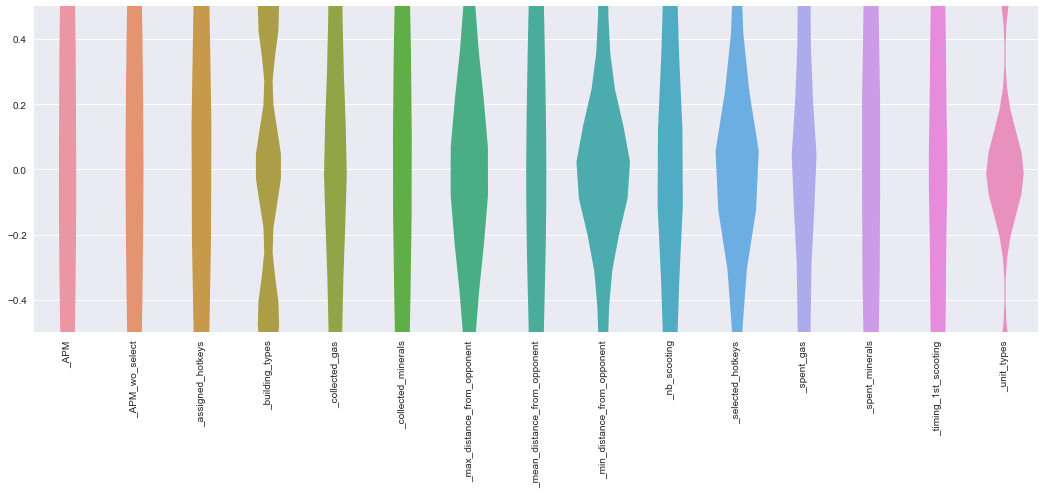

In [65]:
# visualisation via seaborn
plt.figure(figsize=(18, 6))
g = sns.violinplot(data=scaled_df, cut=0, inner=None, linewidth=0)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim(-.5,.5)
plt.show()

In [66]:
# mmesure de dispersion Q3 - Q1
inter_quantile_range = scaled_df.quantile(q=.75) - scaled_df.quantile(q=.25)

In [67]:
inter_quantile_range.sort_values(inplace=True, ascending=False)


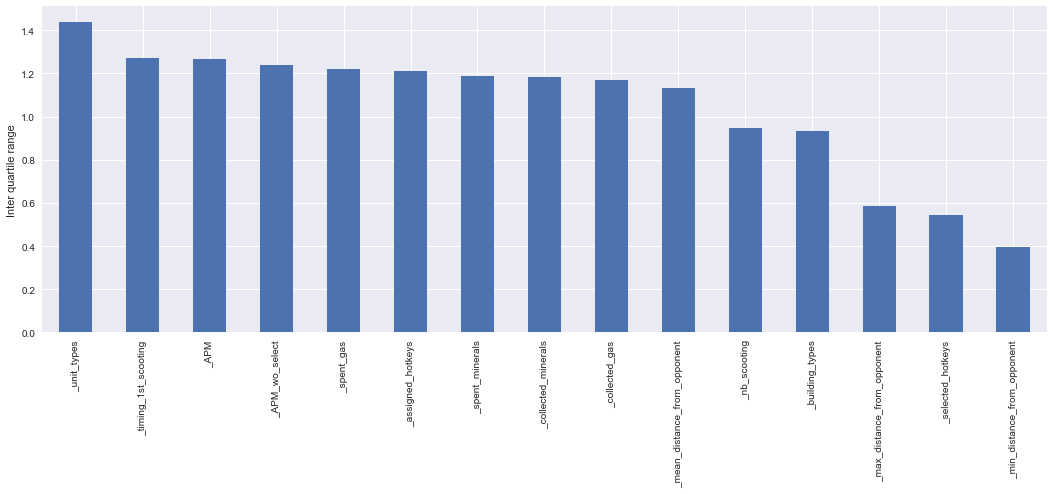

In [68]:
plt.figure(figsize=(18, 6))
inter_quantile_range.plot.bar()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel("Inter quartile range")
plt.show()

In [69]:
# En ne selectionnant que les colonnes avec une forte dispersion
selected_cols = inter_quantile_range.ix[inter_quantile_range > 0.05].index.values
inter_quantile_range.ix[inter_quantile_range > 0.05]
selected_cols

array(['_unit_types', '_timing_1st_scooting', '_APM', '_APM_wo_select',
       '_spent_gas', '_assigned_hotkeys', '_spent_minerals',
       '_collected_minerals', '_collected_gas',
       '_mean_distance_from_opponent', '_nb_scooting', '_building_types',
       '_max_distance_from_opponent', '_selected_hotkeys',
       '_min_distance_from_opponent'], dtype=object)

In [70]:
# on garde les selected_cols et on supprime le reste. Le second argument contient le sous tableau a supprimer
# ici Hatchery est le nombre de couveuses.
# Retiré est exclusif aux zerk et n'est donc pas directement une différence sur un critere rencontré par les 
# deux joueurs ?
selected_cols_wo_APM = np.delete(selected_cols,[1])

In [71]:
scaled_df[selected_cols_wo_APM]

,_unit_types,_APM,_APM_wo_select,_spent_gas,_assigned_hotkeys,_spent_minerals,_collected_minerals,_collected_gas,_mean_distance_from_opponent,_nb_scooting,_building_types,_max_distance_from_opponent,_selected_hotkeys,_min_distance_from_opponent
0,0.708124,-0.724469,-0.503716,0.449966,-1.069830,0.412171,-0.384864,-0.308873,0.169148,0.149388,0.009249,0.709191,-0.778402,0.083984
1,0.708124,-0.019997,-0.891784,-0.913494,-0.463623,0.901388,1.282558,-0.839651,0.017430,-0.134641,-1.389416,-0.121301,-0.596894,0.115220
2,0.708124,-2.489920,-0.407639,-0.411167,-0.160519,-0.659448,0.440781,0.141202,0.392934,0.130453,0.941692,0.123567,-0.006030,-2.669915
3,1.427883,1.528193,1.406478,2.100471,0.445689,-0.822520,-0.658583,2.075489,-0.903005,0.300870,0.475471,-0.158791,-0.230018,-3.502686
4,1.427883,-0.230482,0.650536,0.019400,0.142585,-0.356599,0.850887,-1.395002,-4.187769,1.834622,-0.923194,-0.003569,0.082792,-4.820529
5,-0.011636,-0.224024,-0.260554,-0.482928,1.051896,-0.403191,-0.074763,-0.001063,-0.477572,-0.342928,-0.923194,-0.535820,0.071207,0.499400
6,-0.011636,-0.057171,1.067004,-0.411167,0.142585,-1.008889,0.325478,-0.158331,0.977938,0.073647,-1.389416,0.608434,-2.137775,-0.059420
7,1.427883,-1.469638,0.394942,0.378205,-0.160519,0.575243,0.626196,-0.134016,0.053853,-0.153576,0.009249,-0.566017,0.005555,0.737988
8,-0.011636,0.634791,1.407011,0.162922,0.445689,-0.053750,0.730466,-2.061061,0.265822,-1.554782,0.475471,-0.189438,0.005555,0.346032
9,-0.011636,0.110293,-0.499652,0.737010,-0.008967,-1.544698,-0.925904,1.121537,-0.704410,0.774250,0.941692,0.025233,0.275885,-0.087134


In [72]:
# mise en forme pour train_test
X = scaled_df[selected_cols_wo_APM].as_matrix()
y = non_sparse_dataset._p1_win_game.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
len(X_train)

24205

In [74]:
print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X,y,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Logistic Regression:
0.567
Gradient Boosting Classifier
0.564
Support vector machines:
0.562
Random forest:
0.530
K-nearest-neighbors:
0.521


In [75]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-3, -1, 50)

scores = list()
scores_std = list()

for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=4)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

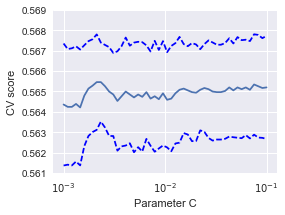

In [76]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')

plt.show()

In [77]:
max(scores)

0.5654588999244986